<a href="https://colab.research.google.com/github/andrewng88/Deep-Learning/blob/master/10_MNIST_the_story_so_far_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# MNIST
# Dataloader, Transformation
# Multilayer NN, activation function
# Loss and Optimizer
# Training Loop ( batch training )
# Model eval
# GPU support - thank you Google Colab

import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

# change directory 
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/
# assert directory
%pwd

torch.Size([100, 1, 28, 28]) torch.Size([100])


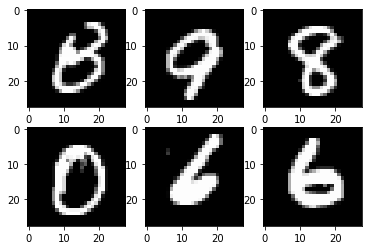

epoch:1/5,step:100/600,loss = 0.4724,
epoch:1/5,step:200/600,loss = 0.3763,
epoch:1/5,step:300/600,loss = 0.2053,
epoch:1/5,step:400/600,loss = 0.1891,
epoch:1/5,step:500/600,loss = 0.2426,
epoch:1/5,step:600/600,loss = 0.2752,
epoch:2/5,step:100/600,loss = 0.1380,
epoch:2/5,step:200/600,loss = 0.2346,
epoch:2/5,step:300/600,loss = 0.1418,
epoch:2/5,step:400/600,loss = 0.1607,
epoch:2/5,step:500/600,loss = 0.1777,
epoch:2/5,step:600/600,loss = 0.1666,
epoch:3/5,step:100/600,loss = 0.0805,
epoch:3/5,step:200/600,loss = 0.1397,
epoch:3/5,step:300/600,loss = 0.0754,
epoch:3/5,step:400/600,loss = 0.1203,
epoch:3/5,step:500/600,loss = 0.1373,
epoch:3/5,step:600/600,loss = 0.2005,
epoch:4/5,step:100/600,loss = 0.1789,
epoch:4/5,step:200/600,loss = 0.1718,
epoch:4/5,step:300/600,loss = 0.1055,
epoch:4/5,step:400/600,loss = 0.1030,
epoch:4/5,step:500/600,loss = 0.1000,
epoch:4/5,step:600/600,loss = 0.1876,
epoch:5/5,step:100/600,loss = 0.0910,
epoch:5/5,step:200/600,loss = 0.1151,
epoch:5/5,st

In [24]:
# hyper parameters
input_size = 784 #mnist image is 28 x 28
hidden_size = 500 # 
num_classes = 10 #digits 0 to 9
num_epochs = 5 # can be higher
batch_size = 100
learning_rate = 0.0005

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           download=True, 
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=2)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape,labels.shape)
# torch.Size([100, 1, 28, 28]) batch size, B&W single channel, 28 x 28
# torch.Size([100]) 100 y_actual

# display osme images
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.input_size = input_size
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    # no activation and no softmax at the end
    return out

# remember to send to GPU
model = NeuralNet(input_size,hidden_size,num_classes).to(device)

#loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=0.001)

#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # origin shape: [100, 1, 28, 28]
    # resized: [100, 784]
    images = images.view(100,784).to(device) #need to reshape because of 100 x 784 hidden layer
    labels = labels.to(device)

    # forward 
    outputs = model(images)
 
    # loss
    loss = criterion(outputs, labels)

    # Backward pass and update
    optimizer.zero_grad() # zero grad before new step
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
        print(f'epoch:{epoch+1}/{num_epochs},step:{i+1}/{n_total_steps},loss = {loss.item():.4f},')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
  #initialize
  n_correct = 0
  n_samples = 0
  
  for images,labels in test_loader:
    images = images.view(100,784).to(device) #need to reshape because of 100 x 784 hidden layer
    labels = labels.to(device)
    outputs = model(images)

  # max returns (value ,index)
    _,predictions = torch.max(outputs,1)
    n_samples +=labels.shape[0]
    n_correct += (predictions == labels).sum().item()
  
  acc = (n_correct / n_samples) * 100
  print(f'Accuracy of the network on the 100 test images: {acc:.3f} %')